In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import Series
from pmdarima import auto_arima

In [13]:
df=pd.read_csv("D:\\DATASETS\\city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [14]:
df = df.loc[df['City'] == 'Delhi']
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [15]:
df=df[['Date','AQI']]
df.head()

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0
10232,2015-01-04,319.0
10233,2015-01-05,325.0


In [16]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)

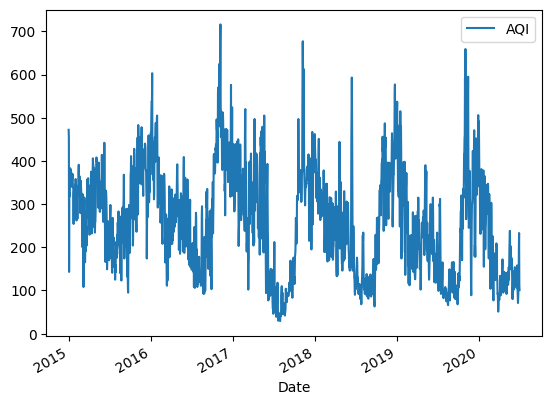

In [17]:
df.plot()
plt.show()

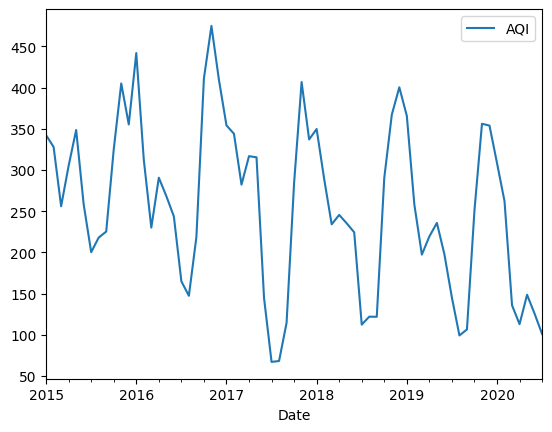

In [18]:
df = df.resample('MS').mean()
df.plot()
plt.show()

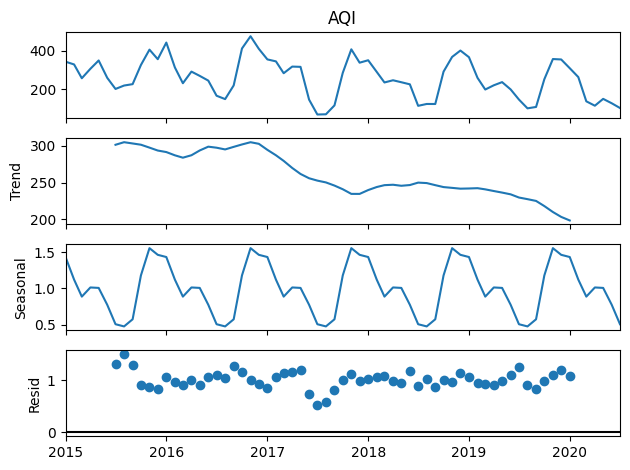

In [23]:
sd=seasonal_decompose(df['AQI'],model='multiplicative',period=12)
sd.plot()
plt.show()

In [24]:
ADF=adfuller(df)
ADF

(0.2290237353747096,
 0.973843264463313,
 11,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 589.030002327377)

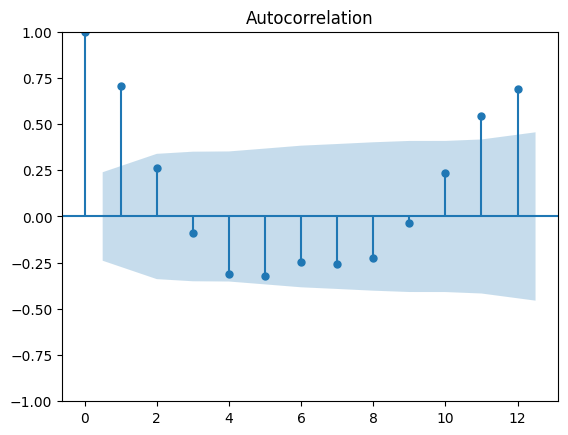

In [25]:
plot_acf(df,lags=12)
plt.show()

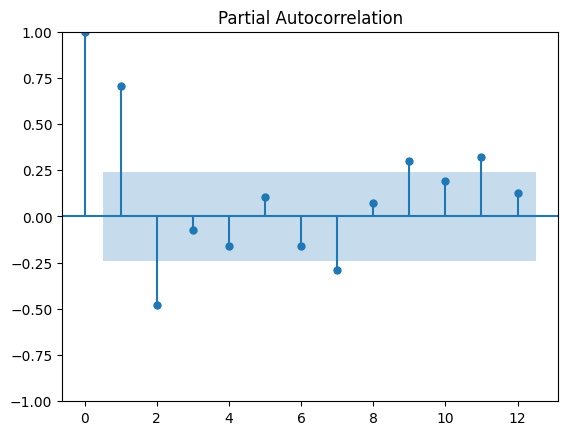

In [26]:
plot_pacf(df,lags=12)
plt.show()

In [30]:

train=df[:54]
test=df[54:]

In [31]:
sarima_model = auto_arima(train, start_p=0, start_q=0,
                      max_p=12, max_q=12,
                      m=12,             
                      d=None,             
                      start_P=1,
                      start_Q=1,
                      max_P=10,
                      max_Q=10,
                      test='adf',   
                      D=None, 
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False,
                         information_criterion='aic')

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=649.483, Time=0.65 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=624.295, Time=0.95 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=inf, Time=9.94 sec
 ARIMA(0,0,0)(0,0,5)[12] intercept   : AIC=inf, Time=21.96 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=606.491, Time=2.77 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=616.410, Time=2.22 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=inf, Time=13.29 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=16.64 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=606.603, Time=2.78 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=6.73 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=19.45 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=608

In [33]:
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood                -284.688
Date:                             Sat, 11 Jan 2025   AIC                            581.377
Time:                                     18:26:23   BIC                            593.311
Sample:                                 01-01-2015   HQIC                           585.979
                                      - 06-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.6302     15.740      1.311      0.190     -10.221      51.481
ar.L1          0.5235      

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model=SARIMAX(train,order=(1,1,1), seasonal_order=(2,0,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False)

In [41]:
model_fit=model.fit()

In [42]:
pred_tes = model_fit.predict(start=test.index.min(), end=test.index.max())

In [43]:
pred_tes

2019-07-01    115.817586
2019-08-01    120.302937
2019-09-01    142.975310
2019-10-01    295.454795
2019-11-01    387.106430
2019-12-01    366.713070
2020-01-01    358.625365
2020-02-01    284.634303
2020-03-01    232.597753
2020-04-01    247.268073
2020-05-01    249.034096
2020-06-01    227.982174
2020-07-01    139.354682
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
test.tail()

,AQI
Date,
2020-03-01,135.838710
2020-04-01,113.000000
2020-05-01,148.645161
2020-06-01,125.733333
2020-07-01,101.000000


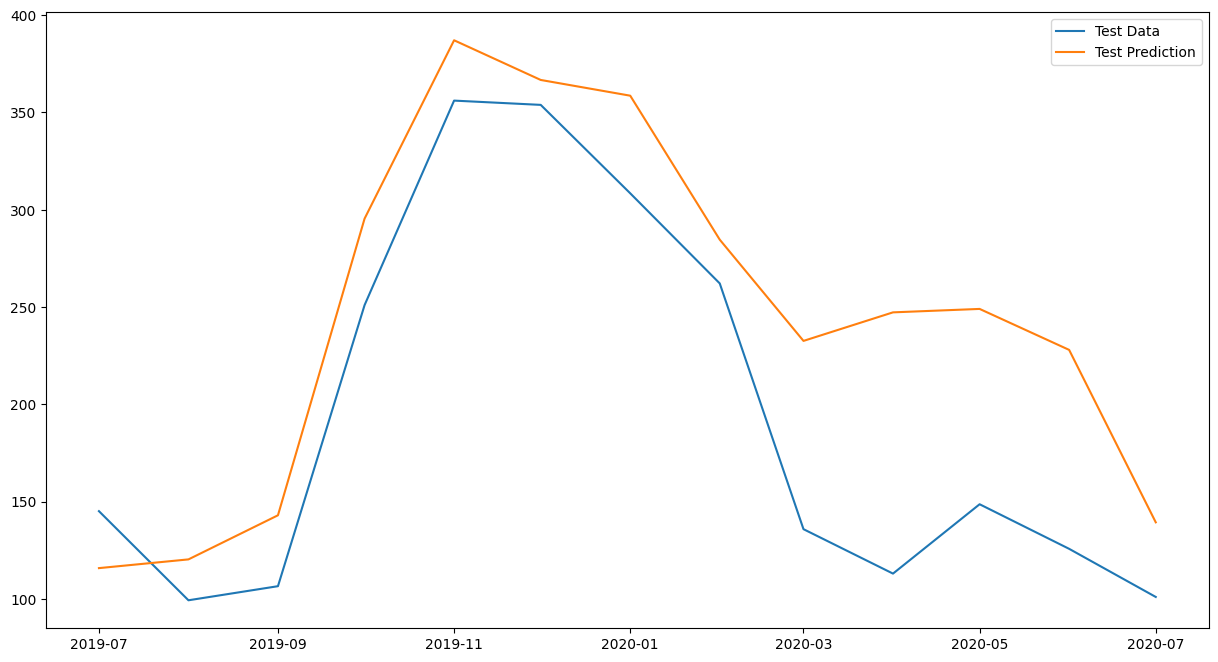

In [45]:
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(pred_tes)
plt.legend(("Test Data","Test Prediction"))
plt.show()

In [46]:
future_start_date="2020-08-01"
future_end_date="2021-07-01"

In [47]:
forecast=model_fit.predict(start=future_start_date,end=future_end_date)
forecast

2020-08-01    145.929933
2020-09-01    155.204262
2020-10-01    300.596375
2020-11-01    375.917333
2020-12-01    383.850057
2021-01-01    363.536791
2021-02-01    280.336040
2021-03-01    229.088554
2021-04-01    245.937035
2021-05-01    254.722196
2021-06-01    227.389286
2021-07-01    150.715195
Freq: MS, Name: predicted_mean, dtype: float64

In [50]:
future_index=pd.date_range(start=future_start_date,end=future_end_date,freq='MS')

In [51]:
forecast_pd=pd.DataFrame(forecast,index=future_index)
forecast_pd

,predicted_mean
2020-08-01,145.929933
2020-09-01,155.204262
2020-10-01,300.596375
2020-11-01,375.917333
2020-12-01,383.850057
2021-01-01,363.536791
2021-02-01,280.336040
2021-03-01,229.088554
2021-04-01,245.937035
2021-05-01,254.722196


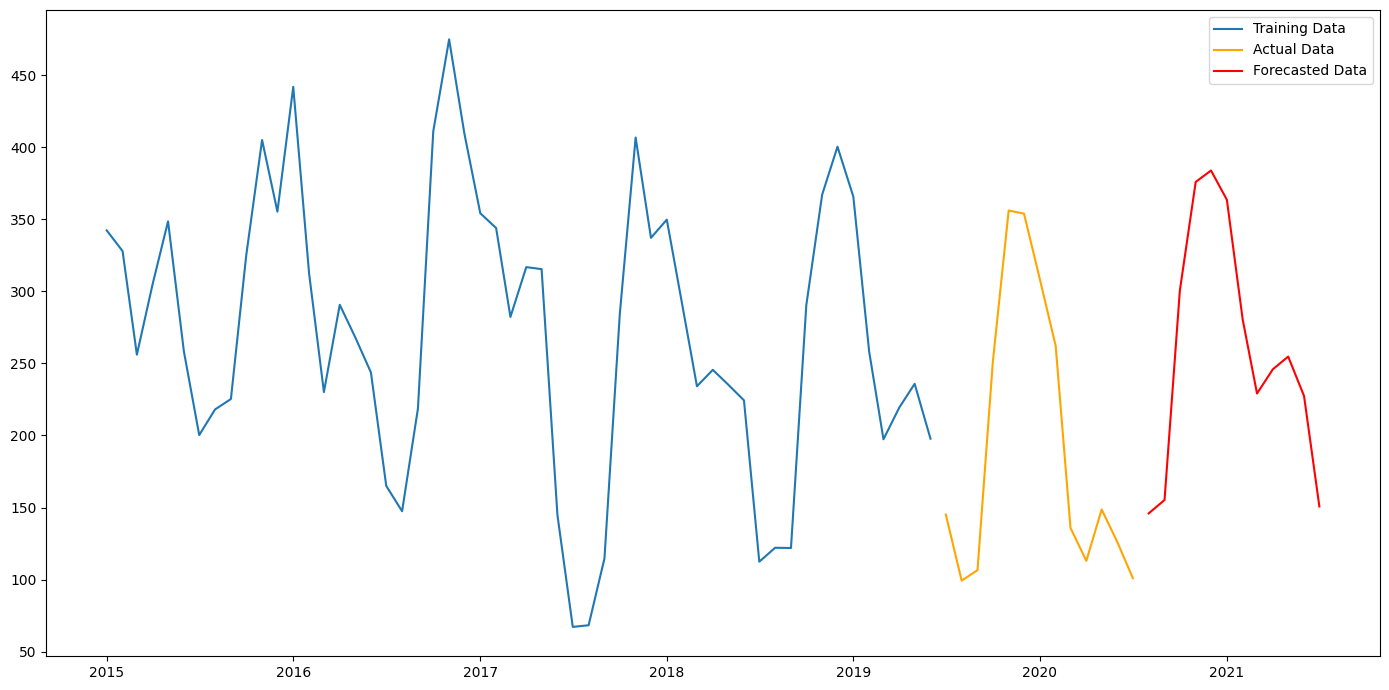

In [53]:
plt.figure(figsize=(14,7))
plt.plot(train.index,train['AQI'],label='Training Data')
plt.plot(test.index,test['AQI'], label='Actual Data', color='orange')
plt.plot(forecast_pd.index ,forecast_pd['predicted_mean'],label='Forecasted Data', color='red')

plt.legend()
plt.tight_layout()
plt.show()